# Setup

In [ ]:
!pip install chemprop
!pip install rdkit-pypi  # should be included in above after Chemprop v1.6 release

# Download test files from GitHub
# !apt install subversion
# !svn export https://github.com/chemprop/chemprop.git/trunk/tests/data

import chemprop
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Train regression model

In [ ]:
arguments = [
    '--data_path', 'regression.csv',
    '--dataset_type', 'regression',
    '--save_dir', 'test_checkpoints_reg',
    '--epochs', '5',
    '--save_smiles_splits'
]

args = chemprop.args.TrainArgs().parse_args(arguments)
mean_score, std_score = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)

Command line
python /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-0032bd56-2b98-45eb-a2cb-890b59e5aa7f.json
Args
{'activation': 'ReLU',
 'adding_bond_types': True,
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_constraints': [],
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'atom_targets': [],
 'batch_size': 50,
 'bias': False,
 'bias_solvent': False,
 'bond_constraints': [],
 'bond_descriptor_scaling': True,
 'bond_descriptors': None,
 'bond_descriptors_path': None,
 'bond_descriptors_size': 0,
 'bond_features_size': 0,
 'bond_targets': [],
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'constraints_path': None,
 'crossval_index_dir': None,

In [ ]:
print('Mean RMSE score: {:.3f}'.format(mean_score))

Mean RMSE score: 1.657


# Predict from file

In [ ]:
arguments = [
    '--test_path', 'test_checkpoints_reg/fold_0/test_smiles.csv',
    '--preds_path', 'test_preds_reg.csv',
    '--checkpoint_dir', 'test_checkpoints_reg'
]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)

Loading training args
Setting molecule featurization parameters to default.
Loading data


50it [00:00, 43142.40it/s]
100%|██████████| 50/50 [00:00<00:00, 82241.25it/s]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Validating SMILES
Test size = 50


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Moving model to cuda



100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

Saving predictions to test_preds_reg.csv
Elapsed time = 0:00:01


In [ ]:
df = pd.read_csv('test_checkpoints_reg/fold_0/test_full.csv')
df['preds'] = [x[0] for x in preds]
df

,smiles,logSolubility,preds
0,C/C1CCC(\C)CC1,-4.470,-2.923180
1,Cc1ccc(OP(=O)(Oc2cccc(C)c2)Oc3ccccc3C)cc1,-6.010,-2.800286
2,c1c(Br)ccc2ccccc12,-4.400,-4.282763
3,CCOc1ccc(cc1)C(C)(C)COCc3cccc(Oc2ccccc2)c3,-8.600,-3.202824
4,CCC1(C(=O)NC(=O)NC1=O)C2=CCCCC2,-2.170,-2.961019
5,C(Cc1ccccc1)c2ccccc2,-4.620,-2.532375
6,Cc1cccc(N)c1,-0.850,-1.932497
7,CCN(CC(C)=C)c1c(cc(cc1N(=O)=O)C(F)(F)F)N(=O)=O,-6.124,-4.090992
8,CC(C)O,0.430,0.151778
9,CCCCCCCCO,-2.390,-3.121082


In [ ]:
def plot_parity(y_true, y_pred, y_pred_unc=None):

    axmin = min(min(y_true), min(y_pred)) - 0.1*(max(y_true)-min(y_true))
    axmax = max(max(y_true), max(y_pred)) + 0.1*(max(y_true)-min(y_true))

    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)

    plt.plot([axmin, axmax], [axmin, axmax], '--k')

    plt.errorbar(y_true, y_pred, yerr=y_pred_unc, linewidth=0, marker='o', markeredgecolor='w', alpha=1, elinewidth=1)

    plt.xlim((axmin, axmax))
    plt.ylim((axmin, axmax))

    ax = plt.gca()
    ax.set_aspect('equal')

    at = AnchoredText(
    f"MAE = {mae:.2f}\nRMSE = {rmse:.2f}", prop=dict(size=10), frameon=True, loc='upper left')
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)

    plt.xlabel('True')
    plt.ylabel('Chemprop Predicted')

    plt.show()

    return

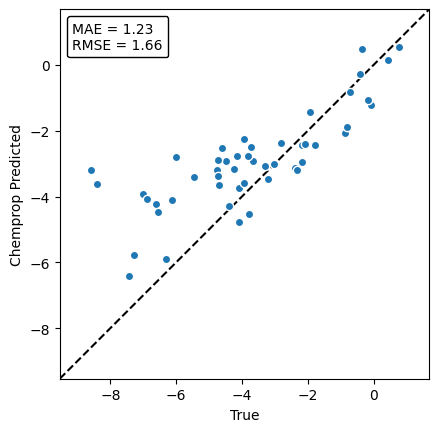

In [ ]:
plot_parity(df.logSolubility, df.preds)

# Train classification model

In [ ]:
arguments = [
    '--data_path', 'bace.csv',
    '--dataset_type', 'classification',
    '--save_dir', 'test_checkpoints_cls',
    '--epochs', '5',
    '--save_smiles_splits'
]

args = chemprop.args.TrainArgs().parse_args(arguments)
mean_auc_score, _ = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)

Command line
python /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-0032bd56-2b98-45eb-a2cb-890b59e5aa7f.json
Args
{'activation': 'ReLU',
 'adding_bond_types': True,
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_constraints': [],
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'atom_targets': [],
 'batch_size': 50,
 'bias': False,
 'bias_solvent': False,
 'bond_constraints': [],
 'bond_descriptor_scaling': True,
 'bond_descriptors': None,
 'bond_descriptors_path': None,
 'bond_descriptors_size': 0,
 'bond_features_size': 0,
 'bond_targets': [],
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'constraints_path': None,
 'crossval_index_dir': None,

In [ ]:
print('Mean AUC score: {:.3f}'.format(mean_auc_score))

Mean AUC score: 0.781
